In [160]:
import pandas as pd
import matplotlib.pyplot as plt

In [161]:
scams = pd.read_csv('../data/DCWP_Consumer_Complaints_20251010.csv',
                   parse_dates=['Intake Date'],
                   dayfirst=False,
                   low_memory=False
)

In [162]:
print(scams.columns.tolist())

['Record ID', 'Intake Date', 'Intake Channel', '311 SR Number', 'Business Category', 'Complaint Code', 'Business Unique ID', 'Business Name', 'Result Date', 'Result', 'Referred To', 'Contract Cancelled Amount', 'Refund Amount', 'Address Type', 'Building Nbr', 'Street1', 'Street2', 'Street3', 'Unit Type', 'Apt/Suite', 'City', 'State', 'Postcode', 'Borough', 'Community Board', 'Council District', 'BIN', 'BBL', 'NTA', 'Census Block (2010)', 'Census Tract (2010)', 'Latitude', 'Longitude']


In [163]:
scams1 = scams.drop(columns=[
    'Record ID',
    '311 SR Number',
    'Business Unique ID',
    'Contract Cancelled Amount',
    'Refund Amount',
    'Address Type',
    'BIN',
    'BBL',
    'NTA',
    'Census Block (2010)',
    'Census Tract (2010)'])

In [164]:
scams1.head()

,Intake Date,Intake Channel,Business Category,Complaint Code,Business Name,Result Date,Result,Referred To,Building Nbr,Street1,...,Unit Type,Apt/Suite,City,State,Postcode,Borough,Community Board,Council District,Latitude,Longitude
0,2025-08-27,311,Other,Other - Z01,WILLIAMS CANDY SHOP,08/27/2025,No Jurisdiction,NaN,1318,SURF AVE,...,NaN,NaN,BROOKLYN,NY,11224,Brooklyn,313.0,47.0,40.575535,-73.981847
1,2025-08-27,311,Misc Non-Food Retail,Advertising/Misleading - A02,FRUIT GARDEN DELI,08/27/2025,Complaint Review Complete,NaN,1624,SHEEPSHEAD BAY RD,...,NaN,NaN,BROOKLYN,NY,11235,Brooklyn,315.0,48.0,40.586786,-73.952569
2,2025-08-27,311,Drug Store Retail,Non-Delivery of Goods - N01,Care first Pharmacy,08/27/2025,Referred,NYS Department of Education: Office of Profess...,3908,WHITE PLAINS RD,...,NaN,NaN,BRONX,NY,10466,Bronx,212.0,12.0,40.886003,-73.861454
3,2025-08-27,311,Grocery-Retail,Advertising/Misleading - A02,KINGS ONE DELI AND GRILL,08/27/2025,Complaint Review Complete,NaN,1424,SHEEPSHEAD BAY RD,...,NaN,NaN,BROOKLYN,NY,11235,Brooklyn,315.0,48.0,40.587462,-73.954509
4,2025-08-27,311,Dry Cleaners,Overcharge,Bright Cleaners,08/27/2025,Insufficient Info Received,NaN,1406,1ST AVE,...,NaN,NaN,NEW YORK,NY,10021,Manhattan,108.0,5.0,40.769358,-73.954851


In [165]:
immigration_scams = scams1[scams1['Business Category'].str.contains('Immigration Service Provider', case=False, na=False)]

In [166]:
len(immigration_scams)

83

In [167]:
immigration_scams.head()

,Intake Date,Intake Channel,Business Category,Complaint Code,Business Name,Result Date,Result,Referred To,Building Nbr,Street1,...,Unit Type,Apt/Suite,City,State,Postcode,Borough,Community Board,Council District,Latitude,Longitude
1281,2025-07-25,Hardcopy,Immigration Service Provider,Other - Z01,Business and Immigration Center Milo Skowronski,07/25/2025,Referred,Other,Riverside Station Blvd,Secaucus,...,NaN,NaN,Secaucus,NJ,07094,Outside NYC,NaN,NaN,NaN,NaN
1772,2025-07-21,Email/Fax,Immigration Service Provider,NaN,ADILAH DIBBA CORP,08/20/2025,Requested Information Not Provided,NaN,1231,LAFAYETTE AVE,...,NaN,NaN,BRONX,NY,10474,Bronx,202.0,17.0,40.816486,-73.890277
5125,2025-06-10,Online,Immigration Service Provider,Other - Z01,PROGRAM U.S. CITIZENSHIP,07/09/2025,Referred,Other,23130,87TH AVE,...,NaN,NaN,JAMAICA,NY,11427,Queens,413.0,23.0,40.731417,-73.737932
7147,2025-05-12,311,Immigration Service Provider,Non-Delivery of Goods - N01,"Cabrera, Ramon",06/12/2025,Requested Information Not Provided,NaN,403,E 138TH ST,...,NaN,NaN,BRONX,NY,10454,Bronx,201.0,8.0,40.808895,-73.922363
7424,2025-05-07,311,Immigration Service Provider,Non-Delivery of Goods - N01,US Immigration and Customs Enforcement,05/07/2025,Referred,Other,26,FEDERAL PLZ,...,NaN,NaN,NEW YORK,NY,10278,Manhattan,101.0,1.0,40.716015,-74.004744


In [168]:
immigration_scams.to_csv("../output/immigration_scams_complaints.csv", index=False)

In [169]:
complaints_by_borough = immigration_scams['Borough'].value_counts()
print(complaints_by_borough)

Borough
Queens         25
Manhattan      18
Brooklyn       15
Bronx          14
Outside NYC     2
Name: count, dtype: int64


In [170]:
top_complaints = immigration_scams['Complaint Code'].value_counts().head(10)
top_complaints.head(10)

Complaint Code
Non-Delivery of Goods - N01                  13
Documents/Paperwork Inaccurate or Missing     8
Misrepresentation - M01                       7
Advertising/Misleading - A02                  7
Non-Delivery of Service - N02                 5
Other - Z01                                   4
Billing Dispute - B02                         3
Exchange/Refund/Return                        3
Goods or Services Not Delivered; -            2
Bill of Rights                                2
Name: count, dtype: int64

In [173]:
complaint_result = (
    immigration_scams.groupby(['Complaint Code', 'Result']).size()
    .reset_index(name='Count')
)

top_complaints = complaint_result.sort_values(by='Count', ascending=False).head(10)

top_complaints.head()

,Complaint Code,Result,Count
13,Documents/Paperwork Inaccurate or Missing,Requested Information Not Provided,5
2,Advertising/Misleading - A02,Requested Information Not Provided,5
23,Non-Delivery of Goods - N01,Referred,5
24,Non-Delivery of Goods - N01,Requested Information Not Provided,5
19,Misrepresentation - M01,Requested Information Not Provided,4


In [174]:
print(immigration_scams['Intake Date'].dtype)

datetime64[ns]


In [177]:
immigration_scams['year'] = immigration_scams['Intake Date'].dt.year

/var/folders/5f/w2x0tg553jq8gh_60lnq6vr00000gn/T/ipykernel_38291/966925716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  immigration_scams['year'] = immigration_scams['Intake Date'].dt.year


In [178]:
complaints = (
    immigration_scams
    .groupby('year')
    .size()
    .reset_index(name='count')
    .sort_values('year')
)

print(complaints)

   year  count
0  2023     23
1  2024     45
2  2025     15


In [179]:
complaints['year'] = complaints['year'].astype(int)

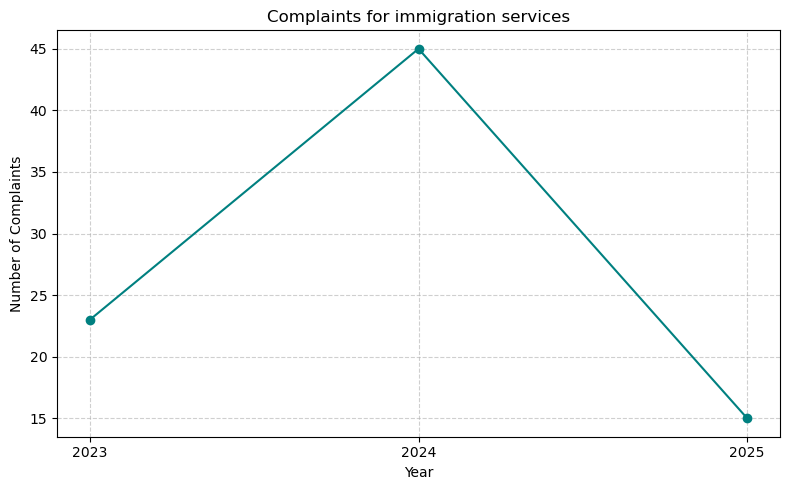

In [180]:
plt.figure(figsize=(8,5))
plt.plot(complaints['year'].astype(str), complaints['count'], marker='o', color='teal')
plt.title('Complaints for immigration services')
plt.xlabel('Year')
plt.ylabel('Number of Complaints')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.savefig('../output/immigration.jpg', dpi=300, bbox_inches='tight')

Business Name
Mubarz Tours Inc                     4
Bonwassit Tax Services               3
Kofi O Amankwaa Esq                  3
Unknown                              2
A&M immigration services             2
Immigration lawyers office           2
SALIS LAW LLC                        2
Mubarez Travel                       2
Jamaican and Immigration Services    2
la jornada                           1
Name: count, dtype: int64


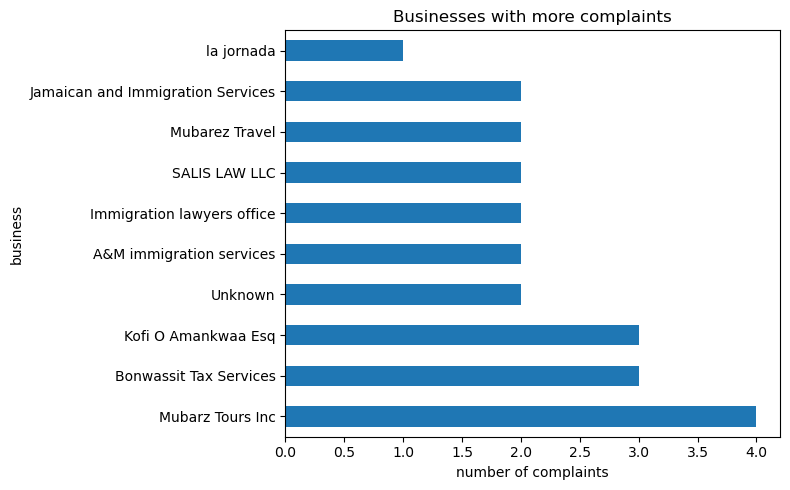

In [181]:
top_businesses = immigration_scams['Business Name'].value_counts().head(10)
print(top_businesses)

top_businesses.plot(kind='barh', figsize=(8,5))
plt.title("Businesses with more complaints")
plt.xlabel("number of complaints")
plt.ylabel("business")
plt.tight_layout()

plt.savefig('../output/business.jpg', dpi=300, bbox_inches='tight')